In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import statsmodels.api as sm

# plt.style.use('ggplot')
# plt.style.use('dark_background')
plt.style.use("seaborn-v0_8")

In [2]:
data = sm.datasets.macrodata.load_pandas().data

columns = data.columns
print(columns)
print(data.head(5))

Index(['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt',
       'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint'],
      dtype='object')
     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


In [3]:
data.index = pd.Index(
    sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

data = data.drop(['year', 'quarter'], axis=1)

print("year" in data.columns)
print("quarter" in data.columns)


False
False


In [4]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

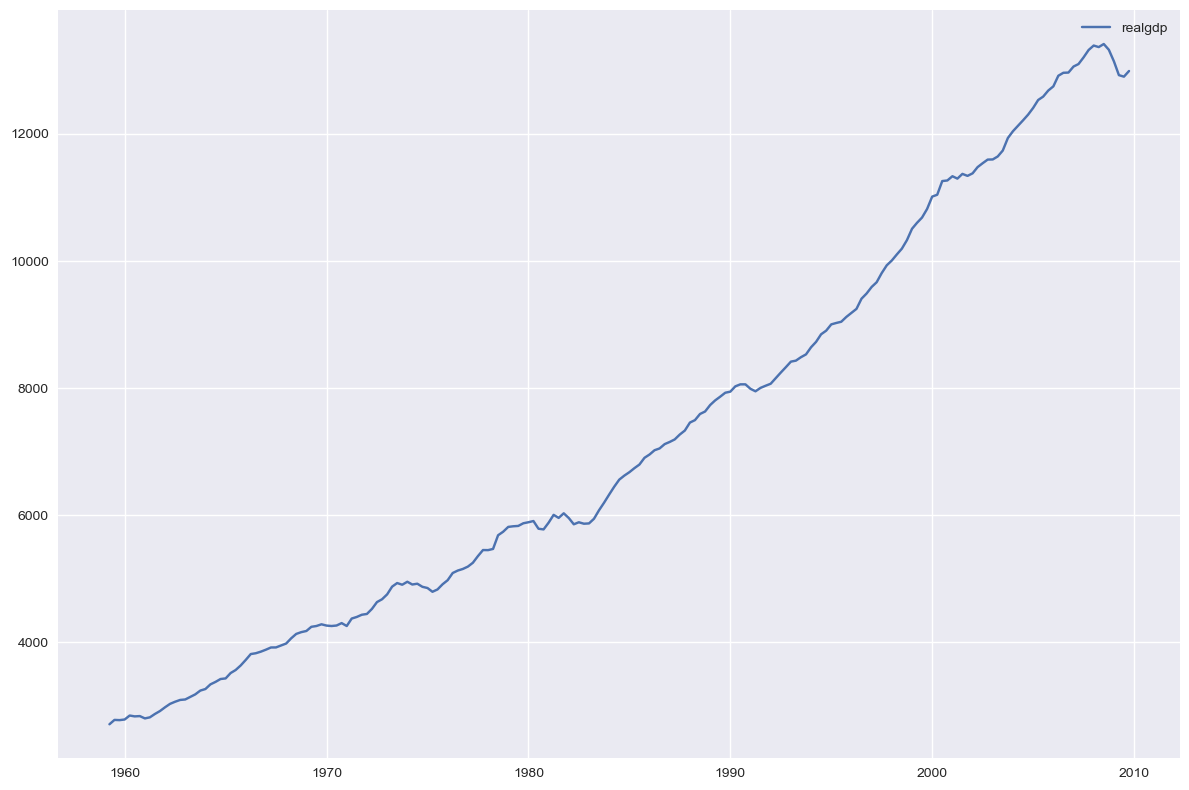

In [5]:
fig = plt.figure(figsize=(12, 8),
                 dpi=100,
                 tight_layout=True)
ax1 = fig.add_subplot(111)
ax1.plot(data['realgdp'], label='realgdp')
legend = ax1.legend()
legend.prop.set_size(20)
plt.show()

Hodrick-Prescott Filter (trend/seasonal)

In [6]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(
    data['realgdp'],
    lamb=1600)

In [7]:
gdp_decomp = data[["realgdp"]].copy()

gdp_decomp["cycle"] = gdp_cycle
gdp_decomp["trend"] = gdp_trend

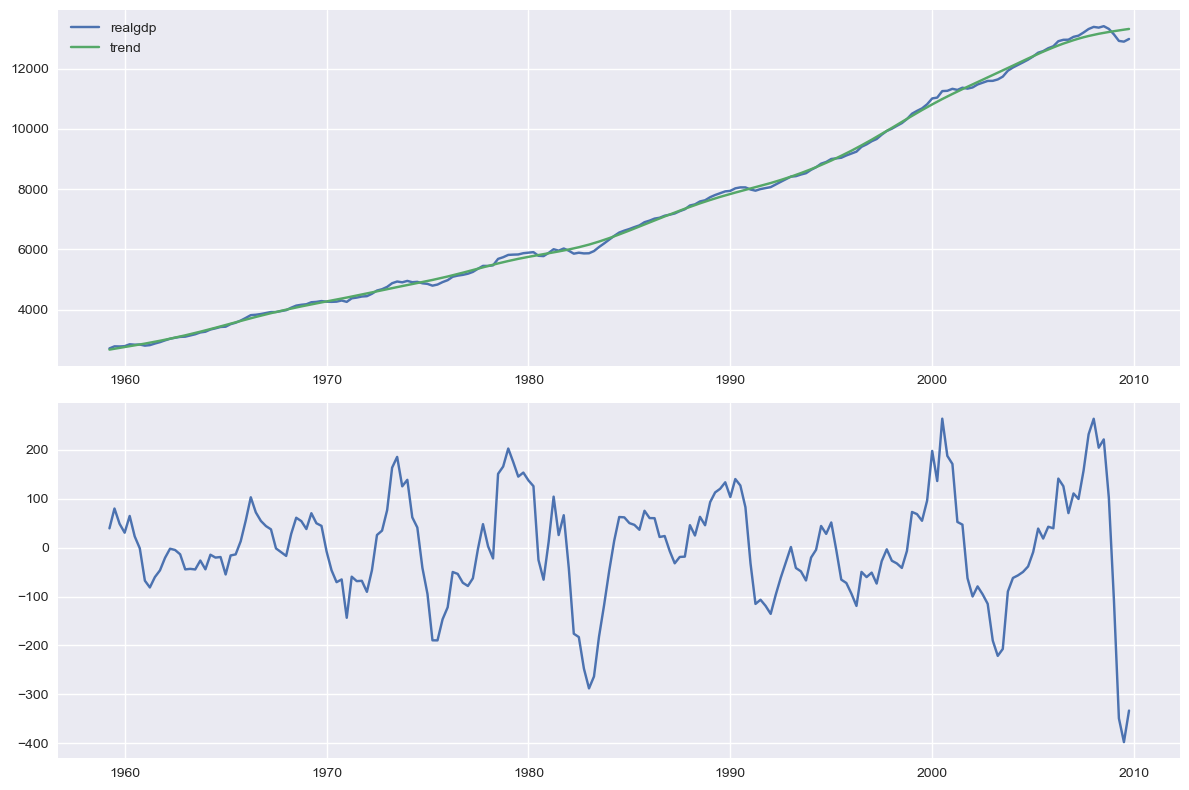

In [8]:
fig, (ax1, ax2) = plt.subplots(
    2, 1,
    figsize=(12, 8),
    dpi=100,
    tight_layout=True)
ax1.plot(data['realgdp'], label='realgdp')
ax1.plot(gdp_trend, label='trend')
ax2.plot(gdp_cycle, label='cycle')
legend = ax1.legend()
legend.prop.set_size(20)
plt.show()

Baxter-King approximate band-pass filter (periodicity)

In [9]:
bk_cycles = sm.tsa.filters.bkfilter(data[['infl', 'unemp']],
                                    low=6,
                                    high=32)
print(bk_cycles.head(5))

            infl_cycle  unemp_cycle
1962-03-31   -0.032350     0.007848
1962-06-30   -0.068328    -0.261702
1962-09-30   -0.129901    -0.243582
1962-12-31   -0.108015    -0.031674
1963-03-31   -0.001769     0.191824


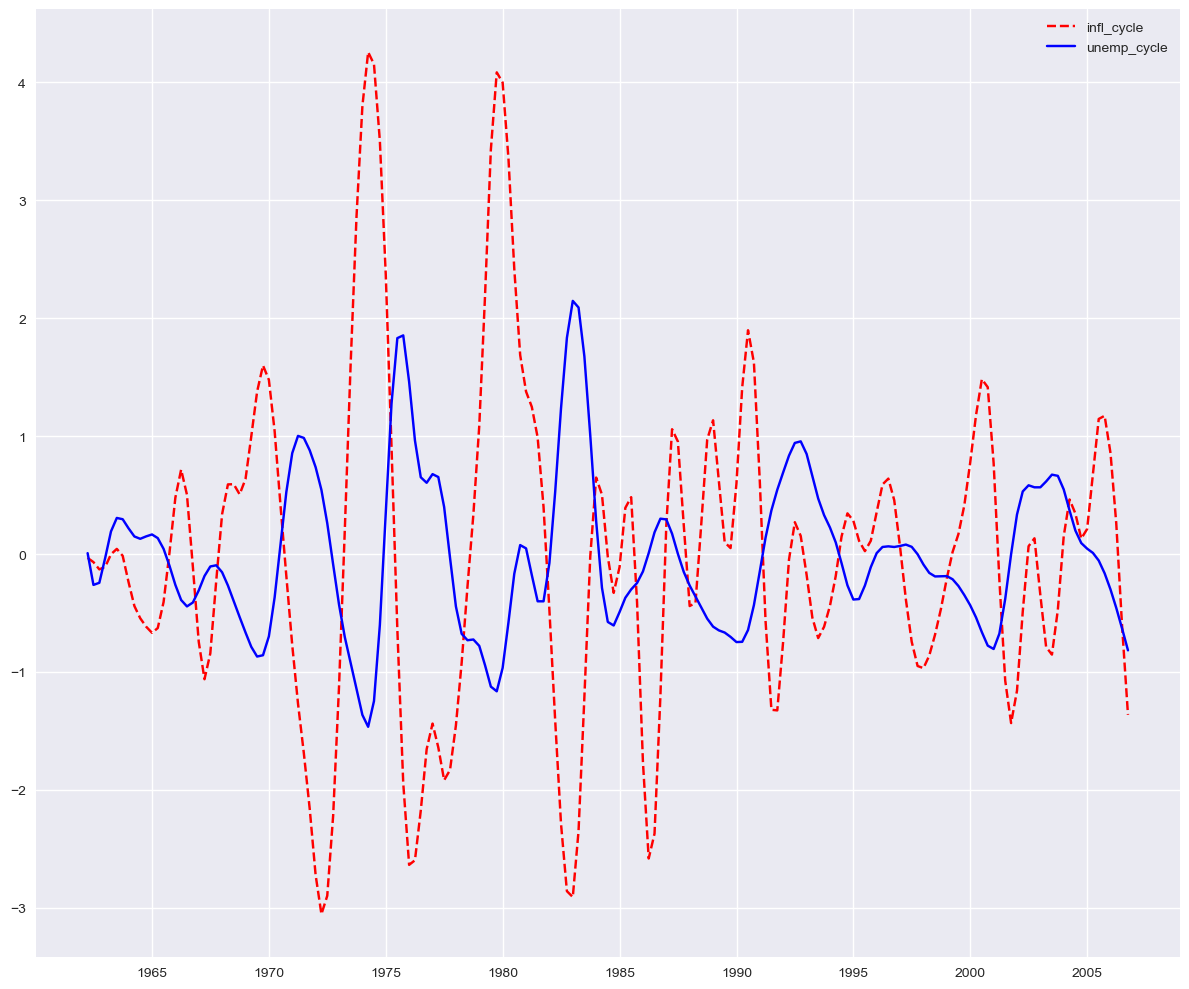

In [10]:
fig = plt.figure(figsize=(12, 10),
                 dpi=100,
                 tight_layout=True)
plt.plot(bk_cycles['infl_cycle'],
         linestyle='--',
         color='r',
         label='infl_cycle')
plt.plot(bk_cycles['unemp_cycle'],
         linestyle='-',
         color='b',
         label='unemp_cycle')
plt.legend()
plt.show()

Christiano-Fitzgerald approximate band-pass filter (periodicity)

In [11]:
cf_cycles, cf_trend = sm.tsa.filters.cffilter(
    data[['infl', 'unemp']],
    low=6,
    high=32)
print(cf_cycles.head(5))

            infl_cycle  unemp_cycle
1959-03-31    0.237927    -0.216867
1959-06-30    0.770007    -0.343779
1959-09-30    1.177736    -0.511024
1959-12-31    1.256754    -0.686967
1960-03-31    0.972128    -0.770793


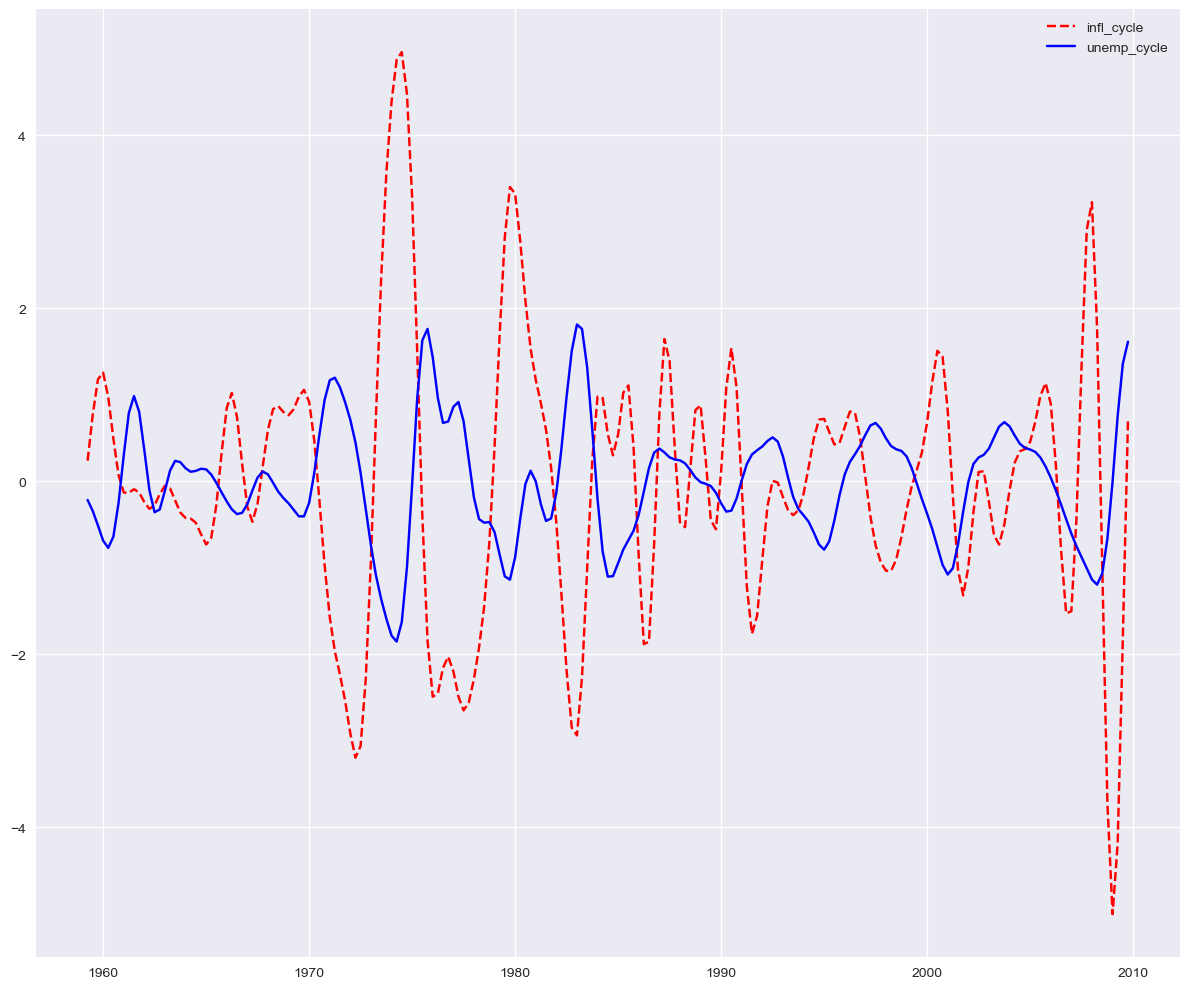

In [12]:
fig = plt.figure(figsize=(12, 10),
                 dpi=100,
                 tight_layout=True)
plt.plot(cf_cycles['infl_cycle'],
         linestyle='--',
         color='r',
         label='infl_cycle')
plt.plot(cf_cycles['unemp_cycle'],
         linestyle='-',
         color='b',
         label='unemp_cycle')
plt.legend()
plt.show()